# Visualiser des principes de base de l'IRM
## Quelques outils pour observer la composition des images du cerveau

Ce notebook présente des exemples d'images IRM utilisant différents types de séquences. Ces images ont pour but de visualiser les différents paramètres de l'IRM et leurs effets sur la représention des tissus.

### Nilearn
Nous utiliserons la [librairie Nilearn](https://nilearn.github.io/user_guide.html) pour effectuer l'ensemble du travail. Accédez la documentation pour davantage d'info et d'exemples.

* Nilearn 6.2

Nilearn est gros, nous pouvons donc n'importer que les parties qui nous intéressent. Nilearn contient le module [`plotting`](https://nilearn.github.io/modules/reference.html#module-nilearn.plotting) qui nous permet de tirer profit, en (presqu') une seule ligne de code, d'une vaste gamme de techniques de visualisation. Vous pouvez aller voir la liste, mais nous commencerons par la base.

## Importer les données
On commence par récupérer des données. [Ici](https://nilearn.github.io/modules/reference.html#module-nilearn.datasets), vous avez la liste des jeux de données qui se retrouvent à même la librairie Nilearn. 

Nous choisissons le *template* (modèle) du Montreal Neurological Institute (MNI). Il s'agit, en quelque sorte, d'un cerveau moyen. Ces données représentent l'espace à partir duquel on repère les différentes régions cérébrales.

In [15]:
from nilearn.datasets import fetch_icbm152_2009
mni = fetch_icbm152_2009() # mni est un dictionnaire contenant plusieurs objets

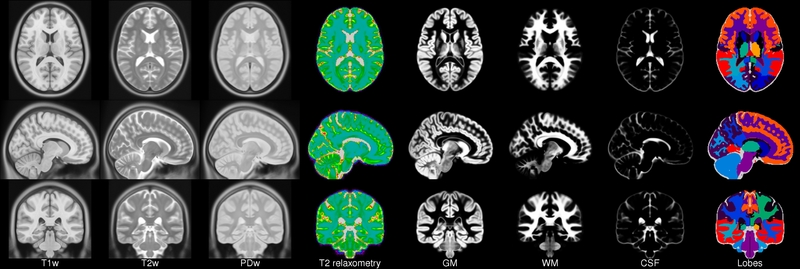

## Images pondérées en T1
On dit plus couramment qu'on utilise une séquence structurelle lorsqu'on regarde ces images. C'est ce qu'on veut dire lorsqu'on parle tout simplement d'une image par résonance magnétique.

`plot_anat` permet de visualiser un scan anatomique. Ici, l'image retourne de façon statique. Nous avons une coordonnée représentée sur les trois coupes (y=0, x=-17, z=17). Nous restons donc en deux dimensions.

C'est une image typique de l'anatomie. Nous pouvons bien distinguer les tissus. La matière grise est grise, la blanche est blanche, les ventricules sont noirs (tout comme une partie de la boîte crânienne). Comme on l'a vu, c'est à l'aide de cette pondération que nous pouvons mener des analyses structurelles.

In [1]:
from nilearn.plotting import plot_anat
plot_anat(mni.t1, cut_coords=[-17, 0, 17],title='MRI en contraste T1')

NameError: name 'mni' is not defined

(Pour ceux et celles qui sont curieux.ses, vous avez là un type d'objet qu'on appelle bytes, utilisé pour représenter le spectre noir à blanc sur les trois axes. Les Bytes prennent moins d'espace de stockage)

In [17]:
mni.t1?

`view_img`, quant à lui, nous permet d'interagir avec l'image à l'aide de notre curseur. On peut donc modifier la coordonnée d'origine.

In [2]:
from nilearn.plotting import view_img 
viewer = view_img(mni.t1, bg_img=None, title='MRI en contraste T1', cmap='gray', symmetric_cmap=False, 
                  black_bg=True, threshold=None,)

NameError: name 'mni' is not defined

In [3]:
viewer.save_as_html('t1.html')

NameError: name 'viewer' is not defined

Nous avons accès à des données HTML (une page web) qui nous permettent d'explorer les trois coupes.  

**[Ouvrez-les](t1.html)** (assurez-vous d'ouvrir ce lien dans un ***nouvel onglet***). Vous pouvez cliquez sur chacune des coupes et déplacer votre curseur afin de vous *déplacer* à travers le cerveau.

## Images pondérées en T2
Nous utilisons encore la fonction `plot_anat` pour représenter le spectre de noir à blanc (0 à 1) qui nous aide à distinguer les tissus. Le T2 est moins intuitif pour les dissocier; on ne l'utilise pas pour explorer les segmentations. 

In [4]:
plot_anat(mni.t2, cut_coords=[-17, 0, 17], title='IRM en contraste T2')

NameError: name 'mni' is not defined

On peut aussi explorer l'image de façon interactive comme avec l'image T1.

In [56]:
viewer = view_img(mni.t2, bg_img=None, title='IRM en contraste T2', cmap='gray', symmetric_cmap=False, 
                  black_bg=True, threshold=None)
viewer.save_as_html('t2.html')

**[Ouvrez la visualisation interactive](t2.html)** (assurez-vous d'ouvrir ce lien dans un ***nouvel onglet***)

### BOLD ou T2*
T2* est un autre type de séquence. Elle a plusieurs applications possibles dont l'imagerie fonctionnelle. Cette séquence nous permet d'imager les variations magnétiques du système vasculaire cérébrale, et notamment le signal BOLD (blood-oxygenation level dependent) utilisé en IRMf. Mais, [le contraste T2*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2799958/) est aussi important pour étudier les traumatismes crâniens, les tumeurs, et les arrêts vasculaires-cérébraux, puisqu'elle nous permet d'imager la structure du système vasculaire.

Importons les données d'IRMf d'un participant de la base de données "ADHD200". 

In [32]:
from nilearn.datasets import fetch_adhd
adhd = fetch_adhd(n_subjects=1)

/home/pbellec/env/psy3018/lib/python3.8/site-packages/nilearn/datasets/func.py:515: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  phenotypic = np.genfromtxt(phenotypic, names=True, delimiter=',',


Visualisons le premier volume de la série

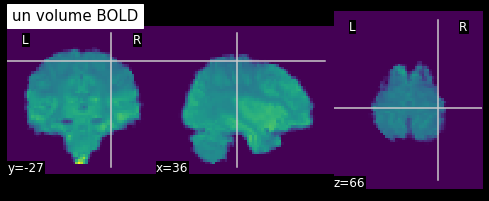

In [49]:
from nilearn.plotting import plot_img
from nilearn.image import index_img
plot_img(index_img(adhd.func[0], 0),
              bg_img=None,
              cut_coords=(36, -27, 66), 
              black_bg=True,
              title="un volume BOLD")

On peut visualiser le deuxième également:

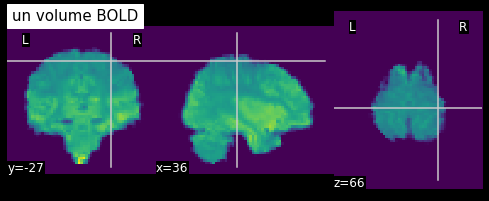

In [50]:
from nilearn.plotting import plot_img
from nilearn.image import index_img
plot_img(index_img(adhd.func[0], 1),
              bg_img=None,
              cut_coords=(36, -27, 66), 
              black_bg=True,
              title="un volume BOLD")

Les deux volumes sont très similaires! Les changements liés à l'oxygénation du sang sont très petits. On peut regarder le volume de manière interactive.

In [55]:
from nilearn.plotting import view_img 
viewer = view_img(index_img(adhd.func[0], 1), bg_img=None, title='un volume BOLD', symmetric_cmap=False, 
                  black_bg=True, threshold=0, cmap='hot')
viewer.save_as_html('bold.html')

**[Ouvrez la visualisation interactive](bold.html)** (assurez-vous d'ouvrir ce lien dans un ***nouvel onglet***)